Зарузка данных

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('..')
input_path = './flowcytometry/'
data = pd.read_csv(os.path.join(input_path, "patient_5.csv"))

In [2]:
data.head()

,Time-,FSC-A-,SSC-A-,FITC-A-IgG,PE-A-IgG2A,PerCP-Cy5-5-A-,PE-Cy7-A-,APC-A-,APC-Cy7-A-,Pacific Blue-A-,AmCyan-A-
0,54.1,126988.69,113333.34,119.21,124.45,192.57,-17.03,117.66,5.30,386.46,385.33
1,54.5,111090.98,51927.09,128.38,186.02,159.82,66.81,126.14,102.82,271.20,453.13
2,54.9,155388.88,124426.41,154.58,171.61,188.64,55.02,83.74,89.04,527.71,458.78
3,55.1,140858.00,145686.41,281.65,255.45,355.01,77.29,234.26,111.30,616.98,640.71
4,55.4,112704.41,59002.40,103.49,284.27,204.36,53.71,101.76,10.60,279.11,339.00


Проверка пустых ячеек

In [3]:
data.isnull().any().sum()

0

Визуализация корреляций

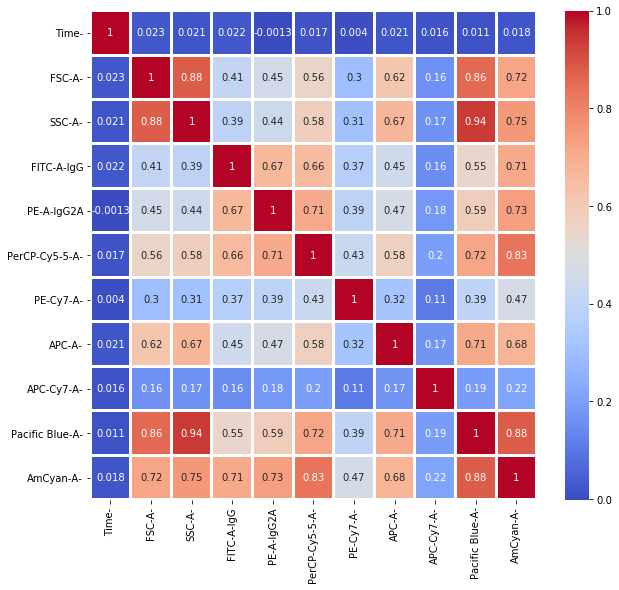

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(data.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

Кластеризация

In [7]:
from ipywidgets import *
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN, SpectralClustering

n_range = range(1,10)
labels = [KMeans(n_clusters=n).fit(data[['FSC-A-','SSC-A-']].to_numpy()).labels_ for n in n_range]

def update(n = (n_range[0],n_range[-1])):
    fig, ax = plt.subplots(figsize=(9, 9))
    sns.scatterplot(data['FSC-A-'],data['SSC-A-'], labels[n])
    fig.canvas.draw()
interact(update);

interactive(children=(IntSlider(value=5, description='n', max=9, min=1), Output()), _dom_classes=('widget-inte…